In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [10]:
#Definicion constantes
N=1000 #numero de agentes
M=1000 #dinero total
W=50 #numero de estados
nsteps=100000 #pasos de tiempo
#random.seed(1)
T=np.divide(M,N)#dinero promedio
agents=np.zeros(N) #creamos un array en cada casilla tenemos el dinero del agente i-esimo

In [3]:
#1. funcion de inicializacion 
def initialize_agents(ag,size,prom):
    for i in range(size):
        ag[i]=prom 

In [4]:
def interaction(ag,N,nsteps,Lambda):
    epsilon=random.uniform(0,1)
    l_entropia=[]
    for k in range(nsteps):
        i=random.randint(0,N-1)
        j=random.randint(0,N-1)
        mi=ag[i]
        mj=ag[j]
        delta_m=(1-Lambda)*(epsilon*mj-(1-epsilon)*mi)
        if i!=j:
            mi += delta_m
            mj -= delta_m  
        if (mi>=0) and (mj>=0):
            ag[i]=mi
            ag[j]=mj
        #inter,frecu,s=entropia(ag,w)
        #l_entropia.append(s)
   # return l_entropia

In [5]:
def entropia(ag,w):
    #parametros para los intervalos
    S=ag.size # numero de agentes
    Imin=np.min(ag)
    Imax=np.max(ag)
    ancho=np.divide((Imax-Imin),1.0*w)
    intervalos=[]
    #parametros calculo de la entropia de Shannon
    pi=np.zeros(w)
    pilnpi=np.zeros(w)
    frec=np.zeros(w)
    #crear los intervalos
    for k in range(w):
        mink=Imin+k*ancho
        maxk=Imin+(k+1)*ancho
        intervalos.append(mink)
        #empezamos a calcular las frecuencias
        if k==w-1: #para el ultimo intervalo la condicion debe ser cerrada para maxk
            frec[k]=len(ag[(ag>=mink) & (ag<=maxk)])
        else:
            frec[k]=len(ag[(ag>=mink) & (ag<maxk)])
        #una vez que ya tenemos la frecuencia, calculamos pi
        pi[k]=np.divide(frec[k],1.0*S)
        #calculamos pi*lnpi
        if pi[k]==0:
            pilnpi[k]=0
        else:
            pilnpi[k]=pi[k]*np.log(pi[k])
    #agregamos el ultimo limite a los intervalos
    intervalos.append(Imax)
    #calculamos la suma de pilnpi
    sumpilnpi=np.sum(pilnpi)
    entropy=-1*sumpilnpi
    #al final retornamos los intervalos, las frecuencias y la entropia
    return intervalos,frec,entropy


In [17]:
#funcion para calcular el gini
def gini(df0):
    N=df0.size
    Itotal=np.sum(df0)
    #creamos arrays para calcular poblacion e ingreso acumulado
    Xing=np.zeros(N) #ingreso de cada individuo/ingreso total
    Xcum=np.zeros(N) #ingreso acumulado
    Xsum=np.zeros(N) #Xk+Xk-1
    Ypob=np.zeros(N) #1/pobtotal
    Ycum=np.zeros(N) #poblacion agregada
    Ydiff=np.zeros(N) #Yk-Yk-1
    XsumYdiff=np.zeros(N) #(Xk+Xk-1)(Yk-Yk-1)
    
    for i in range(N):
        #llenamos array Xing
        Xing[i]=1.0*df0[i]/Itotal
        #llenamos array Xcum
        if i==0:
            Xcum[i]=Xing[i]
        else:
            Xcum[i]=Xing[i]+Xcum[i-1]
        #llenamos array Xsum
        if i==0:
            Xsum[i]=Xcum[i]
        else:
            Xsum[i]=Xcum[i]+Xcum[i-1]
        #hacemos lo mismo para Y
        Ypob[i]=1.0/N
        if i==0:
            Ycum[i]=Ypob[i]
        else:
            Ycum[i]=Ypob[i]+Ycum[i-1]
        if i==0:
            Ydiff[i]=Ycum[i]
        else:
            Ydiff[i]=Ycum[i]-Ycum[i-1]
        #llenar array de multiplicacion (Xk+Xk+1)(Yk-Yk-1)
        XsumYdiff[i]=Xsum[i]*Ydiff[i]
    #una vez todo este lleno calculamos la suma
    sumaXsumYdiff=np.sum(XsumYdiff)
    Gini=1.0-sumaXsumYdiff
    return Xcum, Ycum, Gini

In [18]:
#funcion para calcular el Theil
def theil(df0):
    N=df0.size
    Itotal=np.sum(df0)
    Ui=np.zeros(N) #array fraccion de ingreso con respecto al total
    UilnUi=np.zeros(N)
    for j in range(N):
        Ui[j]=1.0*df0[j]/Itotal
        if Ui[j]==0:
            UilnUi[j]=0
        else:
            UilnUi[j]=Ui[j]*np.log(Ui[j])
    #calculamos la suma Ui*lnUi
    sumaUilnUi=np.sum(UilnUi)
    Theil=1+sumaUilnUi
    Theil_norm=1+np.divide(sumaUilnUi,np.log(N))
    return Theil_norm

In [11]:
#calcular vector de ingresos promedio al repetir varias veces la simulacion

nsim=10000
Lambda=0.1
agentesprom=np.zeros([nsim,N])#creamos una matriz con nsim filas y N columnas
#agentesprom=np.zeros(N)
l_entroprom=[]

for i in range(nsim):
    initialize_agents(agents,N,T)
    #l_entropia=interaction(agents,N,nsteps,W)
    interaction(agents,N,nsteps,Lambda)
    ag_sort=np.sort(agents)
    agentesprom[i]=ag_sort
    agents=np.zeros(N)
    #for j in range(N):
           #agentesprom[j] += np.divide(agents[j],1.0*nsim)

#initialize_agents(agents,N,T)
#l_entropia=interaction(agents,N,nsteps,W)

In [12]:
promedio_ag=np.mean(agentesprom,axis=0)

In [13]:
intervals, frecuencies, s_eq=entropia(promedio_ag,W)

Text(0, 0.5, 'Distribucion de individuos')

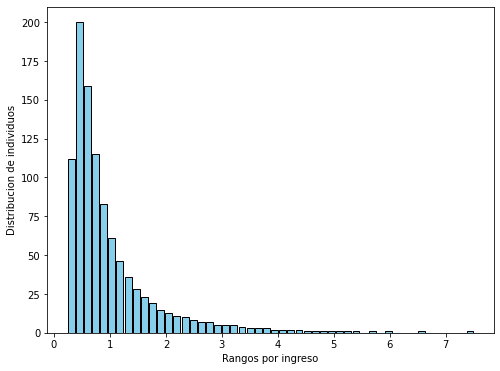

In [25]:
fig = plt.figure(figsize=(8,6))
plt.hist(x=promedio_ag,bins=intervals,color="skyblue",rwidth=0.85,lw=1,edgecolor='black')
plt.xlabel('Rangos por ingreso')
plt.ylabel('Distribucion de individuos')
#plt.xticks(intervals)
#fig.savefig('CC01.png')

In [16]:
#enviar datos a excel
#df1=pd.DataFrame(data=promedio_ag)
#df1.to_excel('promedioagentesCC01.xlsx')

In [20]:
print("Intervalos :", intervals)
print("ni por rango:", frecuencies)

Intervalos : [0.23147241 0.37696631 0.52246021 0.66795411 0.81344801 0.95894192
 1.10443582 1.24992972 1.39542362 1.54091752 1.68641143 1.83190533
 1.97739923 2.12289313 2.26838703 2.41388094 2.55937484 2.70486874
 2.85036264 2.99585654 3.14135045 3.28684435 3.43233825 3.57783215
 3.72332605 3.86881996 4.01431386 4.15980776 4.30530166 4.45079556
 4.59628947 4.74178337 4.88727727 5.03277117 5.17826507 5.32375898
 5.46925288 5.61474678 5.76024068 5.90573458 6.05122849 6.19672239
 6.34221629 6.48771019 6.63320409 6.778698   6.9241919  7.0696858
 7.2151797  7.3606736  7.50616751]
ni por rango: [112. 200. 159. 115.  83.  61.  46.  36.  28.  23.  19.  15.  13.  11.
  10.   8.   7.   7.   5.   5.   5.   4.   3.   3.   3.   2.   2.   2.
   2.   1.   1.   1.   1.   1.   1.   1.   0.   1.   0.   1.   0.   0.
   0.   1.   0.   0.   0.   0.   0.   0.]


In [21]:
#enviar datos a excel
#IntervalosCC01=pd.DataFrame(data=intervals)
#FrecCC01=pd.DataFrame(data=frecuencies)
#IntervalosCC01.to_excel('intervalosCC01.xlsx')
#FrecCC01.to_excel('frecuCC01.xlsx')

In [30]:
#Gini
#Primero Verificamos que nuestro vector de dinero promedio este ordenado
np.all(np.diff(promedio_ag) >= 0)


True

In [31]:
#Calculamos el Gini
lista1Xcum, lista1Ycum, l1gini = gini(promedio_ag)

print('El índice de Gini: ')
print(l1gini)
#print(np.sum(promedio_ag))

El índice de Gini: 
0.3923325720752131


In [32]:
#Theil 
print('El índice de Theil: ')
l1theil=theil(promedio_ag)
print(l1theil)

El índice de Theil: 
0.039440734770458286


In [35]:
#La entropia de Shannon para m=W
print('La entropia de Shannon para m=W: ')
inter,l1frecW,l1entrW = entropia(promedio_ag,W)
print(l1entrW)

La entropia de Shannon para m=W: 
2.6047100156657077


In [36]:
#La entropia de Shannon para m=20
print('La entropia de Shannon para m=20: ')
inter20,l1frec20,l1entr20 = entropia(promedio_ag,20)
print(l1entr20)
#La entropia de Shannon para m=20
print('La entropia de Shannon para m=10: ')
inter10,l1frec10,l1entr10 = entropia(promedio_ag,10)
print(l1entr10)

La entropia de Shannon para m=20: 
1.7212014610625208
La entropia de Shannon para m=10: 
1.0524464477901685
